In [42]:

from sklearn.datasets import load_files
import numpy as np

train_dir = '../input/fruits/Fruits_1/Training'
test_dir = '../input/fruits/Fruits_1/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  21168
Testing set size :  7115


In [43]:

no_of_classes = len(np.unique(y_train))
no_of_classes

41

In [44]:
print(y_train[0:10])


[14 17 37 31 11 22 38  3  5 18]


In [45]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [46]:
x_test,x_valid = x_test[3500:],x_test[:3500]
y_test,y_vaild = y_test[3500:],y_test[:3500]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (3500,)
Vaildation y : (3500, 41)
Test X :  (3615,)
Test y :  (3615, 41)


In [47]:
x_train[0]

'../input/fruits/Fruits_1/Training/Banana Lady Finger/r_4_100.jpg'

In [48]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (21168, 100, 100, 3)
Validation set shape :  (3500, 100, 100, 3)
Test set shape :  (3615, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [49]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model=Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 256,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(41,activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 100, 100, 16)      208       
_________________________________________________________________
activation_7 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 64)       

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [51]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
batch_size = 50

checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 50,
        epochs=15,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
                    verbose=2,shuffle=True
        )

Train on 21168 samples, validate on 3500 samples
Epoch 1/15
 - 6s - loss: 2.8763 - accuracy: 0.2859 - val_loss: 0.5877 - val_accuracy: 0.8466

Epoch 00001: val_loss improved from inf to 0.58775, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/15
 - 6s - loss: 0.4583 - accuracy: 0.8451 - val_loss: 0.1582 - val_accuracy: 0.9451

Epoch 00002: val_loss improved from 0.58775 to 0.15820, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/15
 - 5s - loss: 0.1561 - accuracy: 0.9468 - val_loss: 0.1482 - val_accuracy: 0.9577

Epoch 00003: val_loss improved from 0.15820 to 0.14818, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/15
 - 5s - loss: 0.1072 - accuracy: 0.9640 - val_loss: 0.0905 - val_accuracy: 0.9860

Epoch 00004: val_loss improved from 0.14818 to 0.09048, saving model to cnn_from_scratch_fruits.hdf5
Epoch 5/15
 - 6s - loss: 0.0795 - accuracy: 0.9749 - val_loss: 0.1292 - val_accuracy: 0.9677

Epoch 00005: val_loss did not improve from 0.09048
Epoch 6/15
 - 5s - loss: 0.077

In [52]:
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [53]:

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9867219924926758


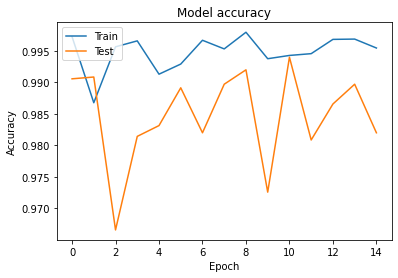

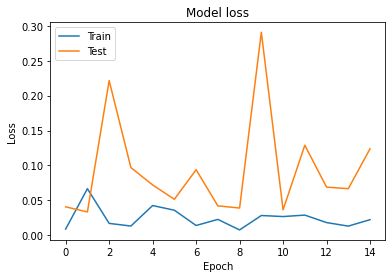

In [41]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()